# 03_Linear_Regression_Model

In [2]:
import torch
from torch.autograd import Variable

from torch import nn # Basic Neural Network Module

In [3]:
# Needs for Ploting
import matplotlib.pyplot as plt
%matplotlib inline
torch.manual_seed(1)

### Prepare Data

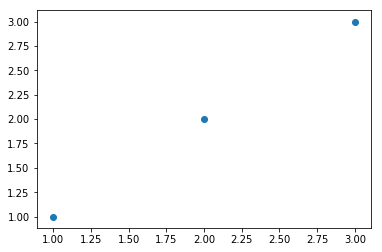

In [4]:
# X and Y training data
x_train = torch.Tensor([[1], [2], [3]])
y_train = torch.Tensor([[1], [2], [3]])

# x_train = torch.Tensor([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168], 
#                     [9.779], [6.182], [7.59], [2.167], [7.042], 
#                     [10.791], [5.313], [7.997], [3.1]])

# y_train = torch.Tensor([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573], 
#                     [3.366], [2.596], [2.53], [1.221], [2.827], 
#                     [3.465], [1.65], [2.904], [1.3]])

x, y = Variable(x_train), Variable(y_train)

plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

## Naive Linear Regression Model

### Define Linear Regression Model

In [6]:
x # data [batch_size x input_dimenstion]

Variable containing:
 1
 2
 3
[torch.FloatTensor of size 3x1]

In [11]:
W = Variable(torch.rand(1,1)) # [input dimension x output dimension]
W 

Variable containing:
 0.9326
[torch.FloatTensor of size 1x1]

In [12]:
x.mm(W) # Naive Linear Regression Model !!

Variable containing:
 0.9326
 1.8651
 2.7977
[torch.FloatTensor of size 3x1]

### Define MSE Cost function

In [14]:
cost_func = nn.MSELoss()                 # Our mean squared Cost function 

### Training Linear Regression Model

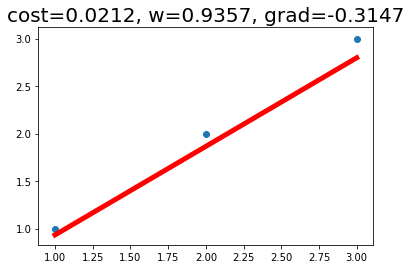

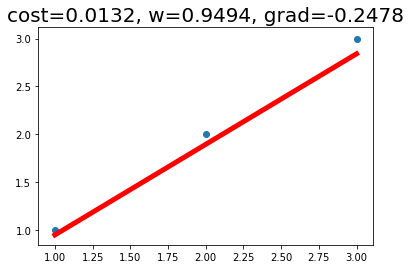

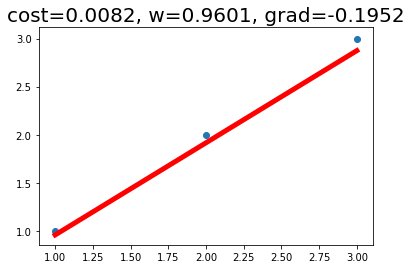

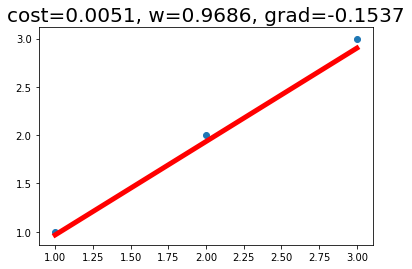

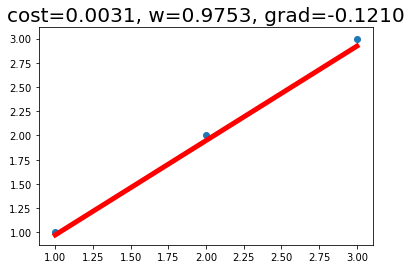

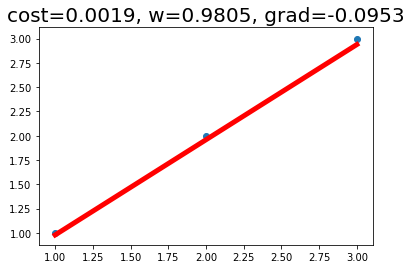

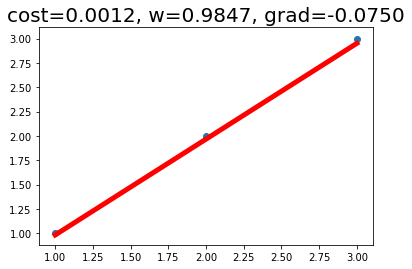

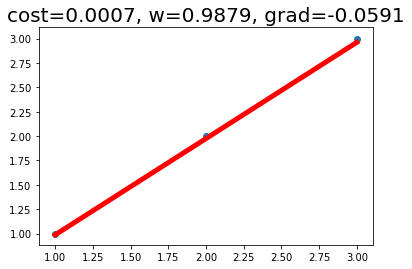

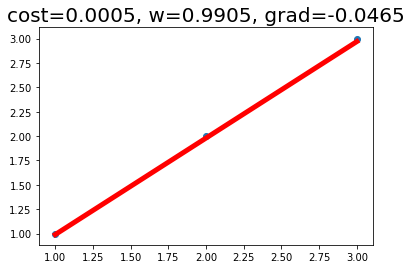

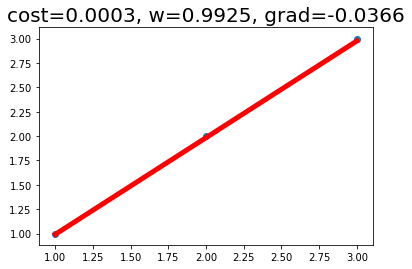

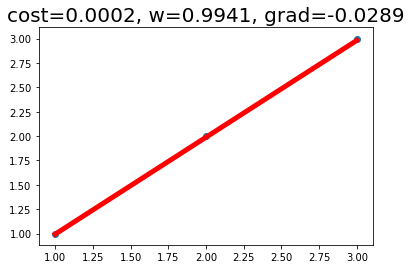

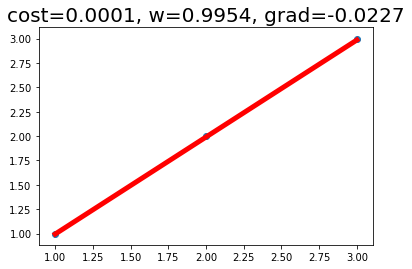

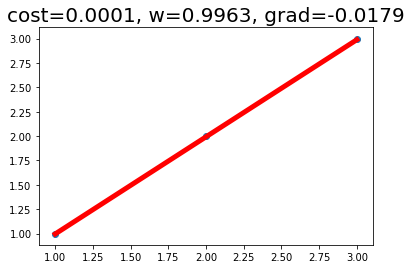

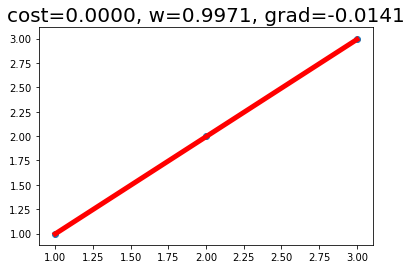

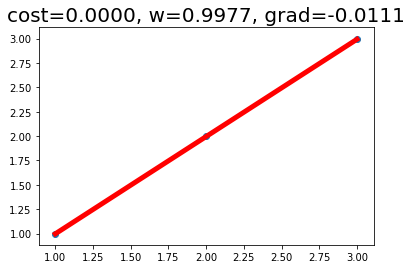

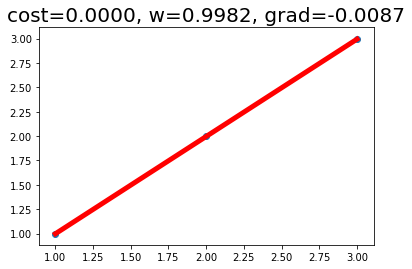

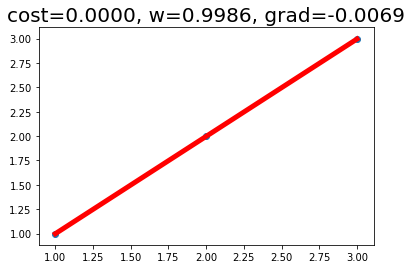

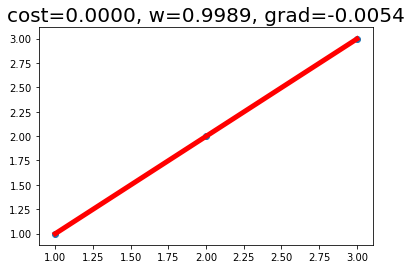

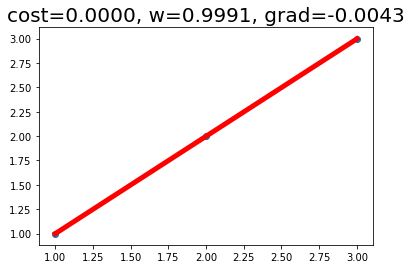

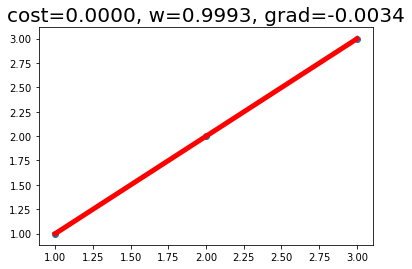

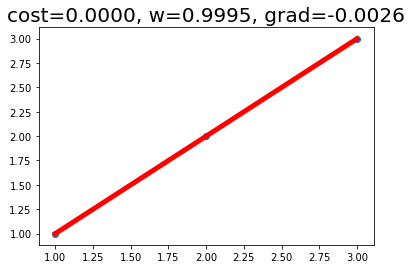

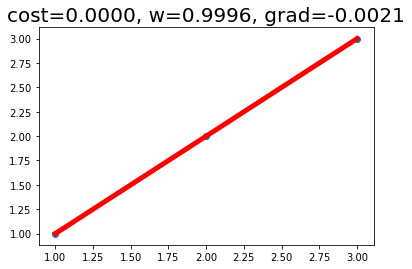

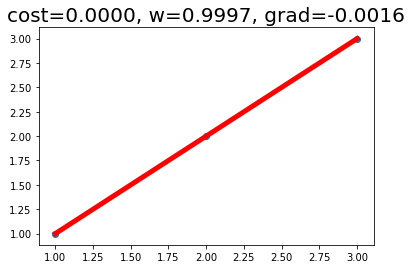

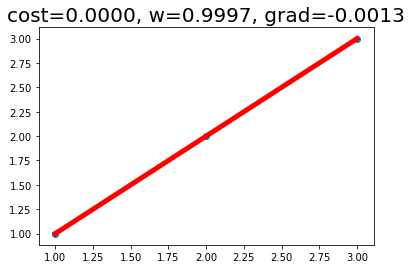

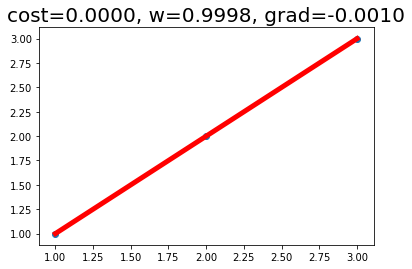

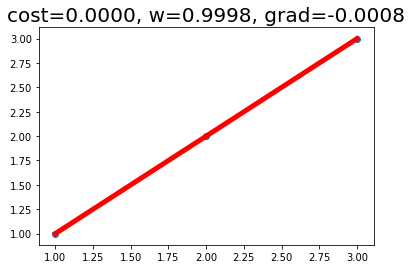

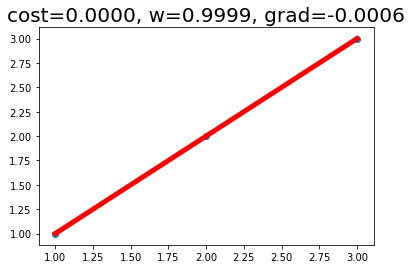

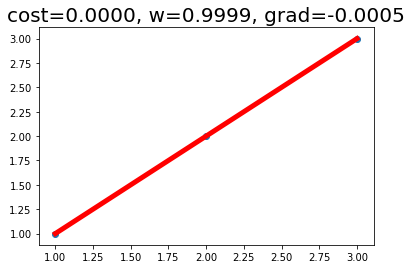

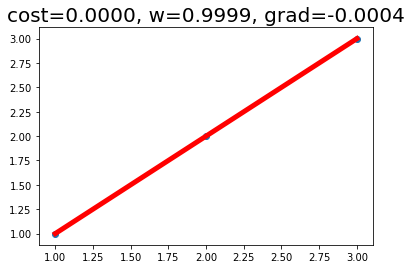

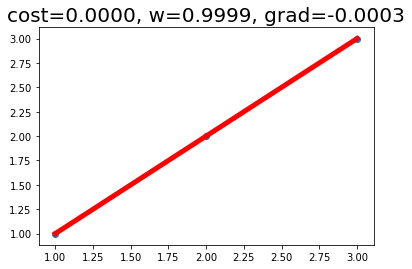

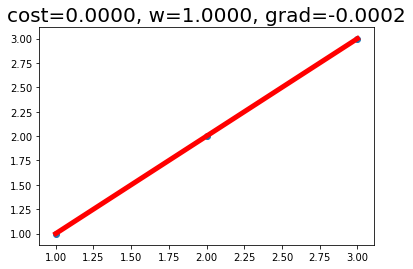

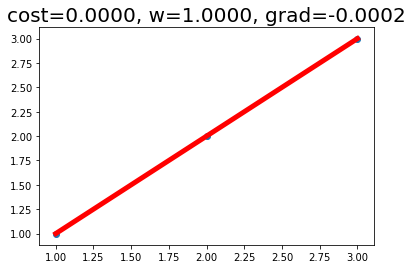

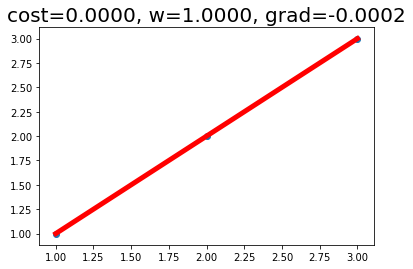

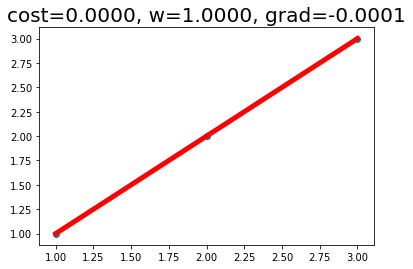

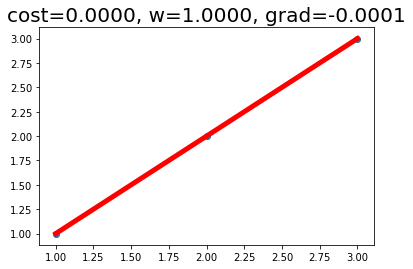

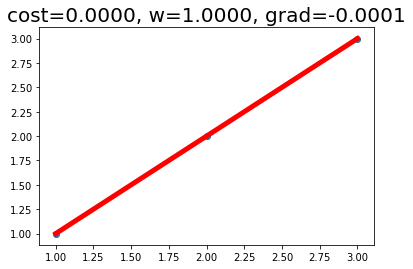

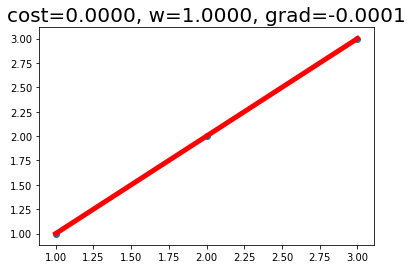

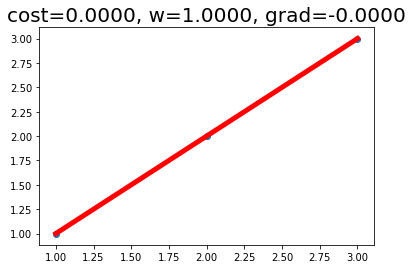

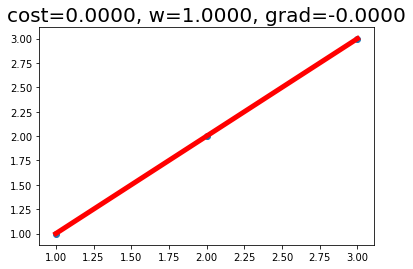

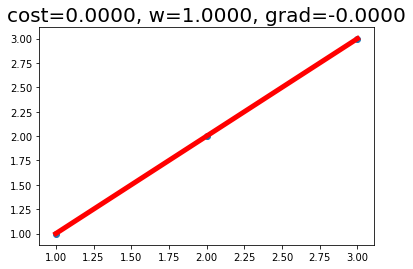

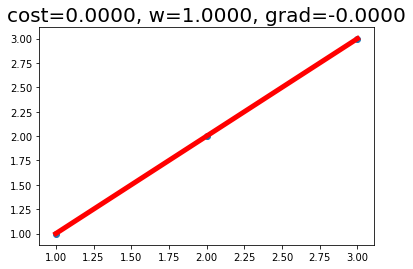

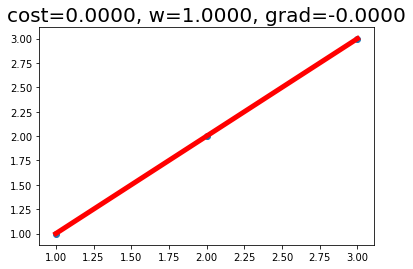

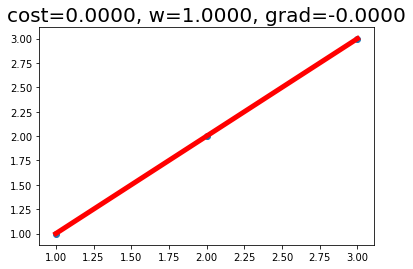

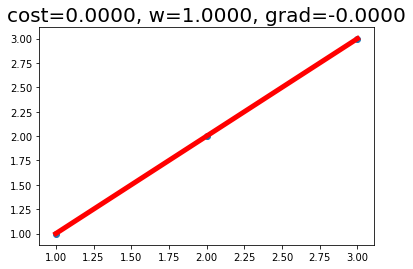

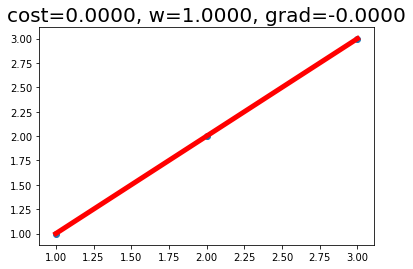

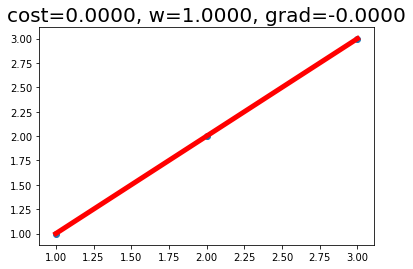

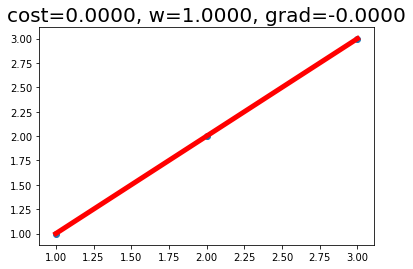

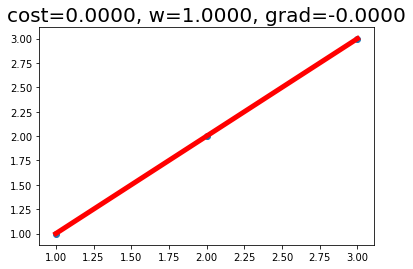

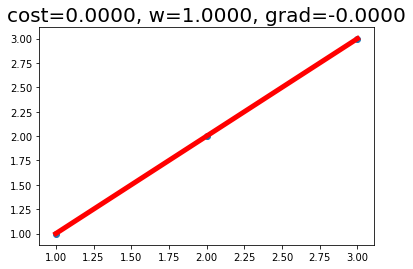

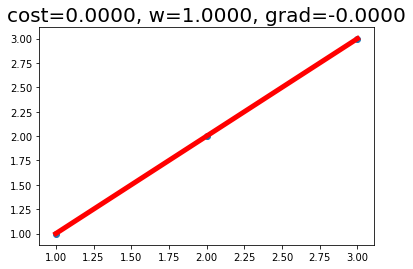

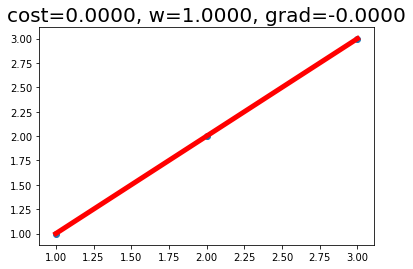

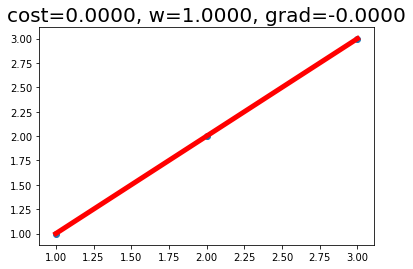

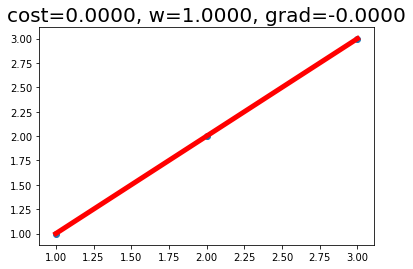

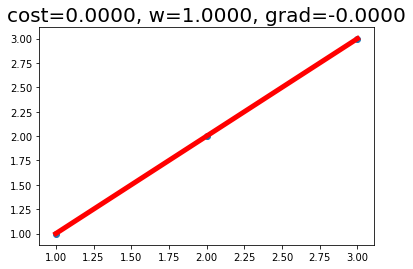

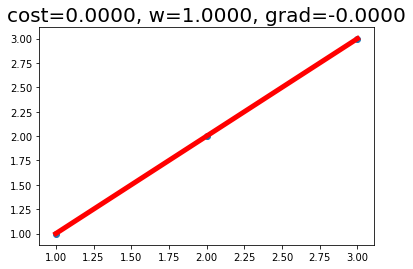

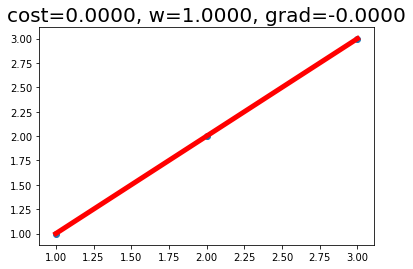

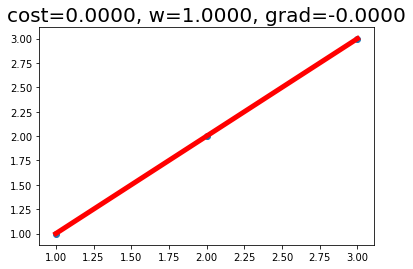

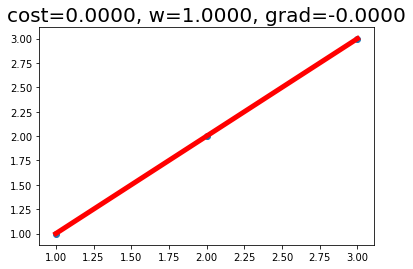

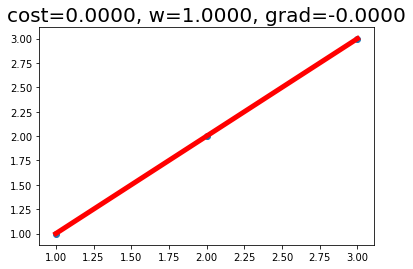

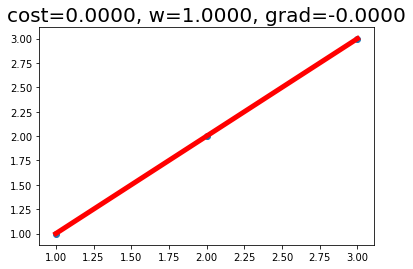

Linear Model Optimization is Done!


In [15]:
plt.ion()   # something about plotting

lr = 0.01 # learning rate

for step in range(300):

    prediction = x.mm(W)                                         # Our Model XW
    cost = cost_func(prediction, y)                              # must be (1. prediction, 2. training target y) 
    gradient = (prediction-y).view(-1).dot(x.view(-1)) / len(x)  # Compute Gradient of cost w.r.t W (dCost/dW) 
    W -= lr * gradient                                           # Update weight parameter with learning lr
    

    if step % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.title('cost=%.4f, w=%.4f, grad=%.4f' % (cost.data[0], W.data[0][0], gradient.data[0]), fontdict={'size': 20} )
        plt.show()
        plt.pause(0.1)
        
print('Linear Model Optimization is Done!')

plt.ioff()

### Prediction (Test)

In [17]:
x_test = Variable(torch.Tensor([[5]])) # Test input also need to be a Variable
y_test = x_test.mm(W) # our trained model
print(y_test)

Variable containing:
 5.0000
[torch.FloatTensor of size 1x1]



## Linear Regression Model w/ nn Module

### Define Linear Regression Model w/ nn Module

In [22]:
model = nn.Linear(1, 1, bias=True)    # Our full linear regression Model XW+b

print(model)  # model

model.weight, model.bias # model object is holding all necessary variables

Linear (1 -> 1)


(Parameter containing:
 -0.8153
 [torch.FloatTensor of size 1x1], Parameter containing:
 -0.2068
 [torch.FloatTensor of size 1])

In [20]:
cost_func = nn.MSELoss()              # Our mean squared Cost function 

In [23]:
optimizer = torch.optim.SGD(model.parameters(), lr= 0.01) # This is SGD Optimizer

### Training Your Model w/ optim Module

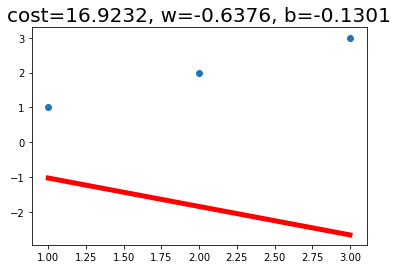

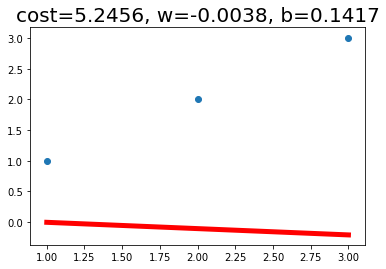

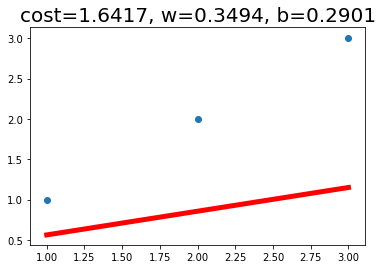

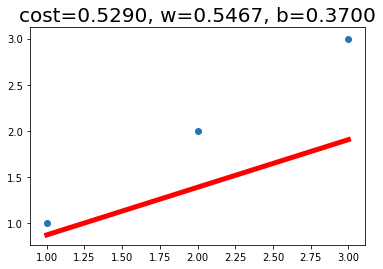

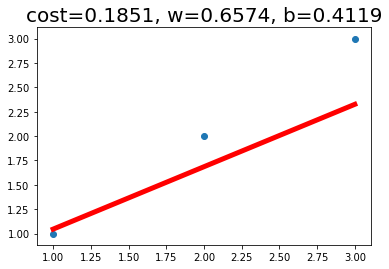

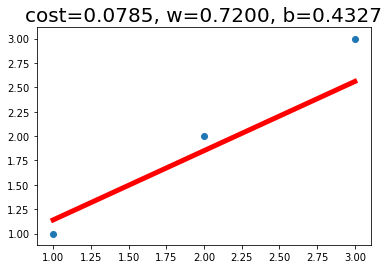

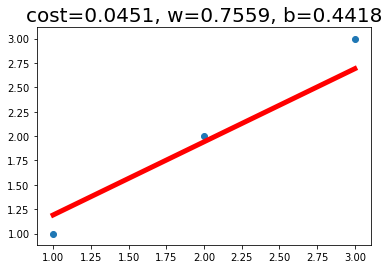

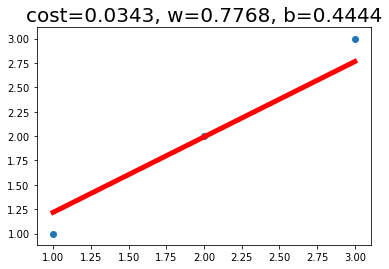

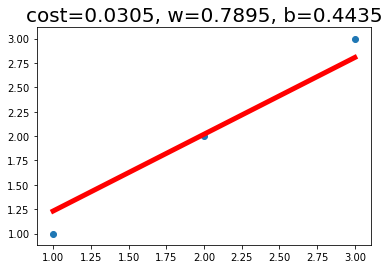

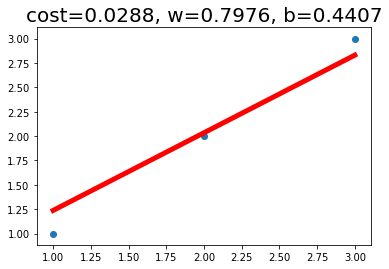

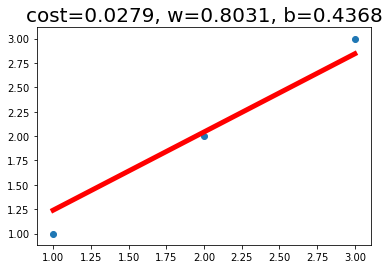

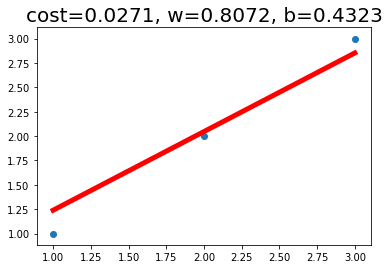

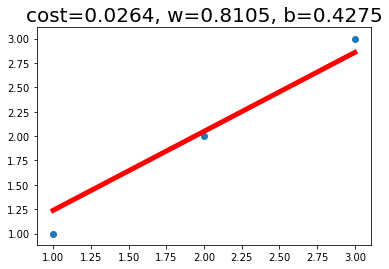

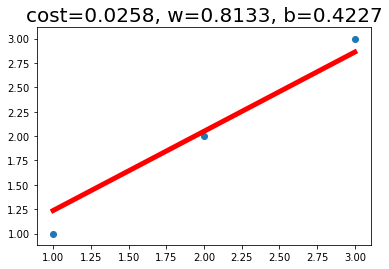

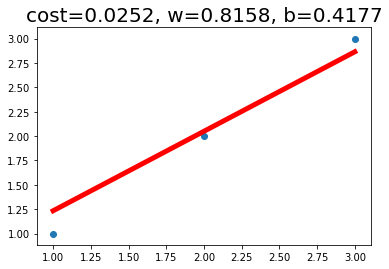

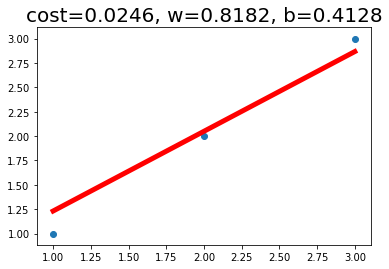

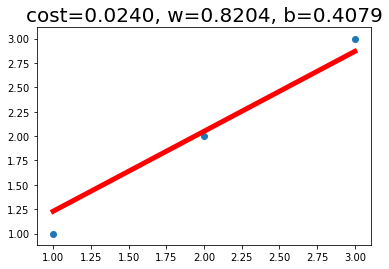

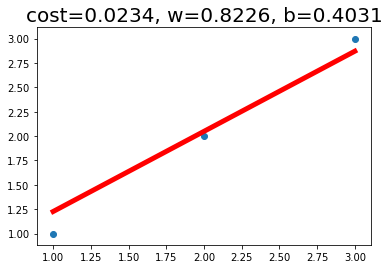

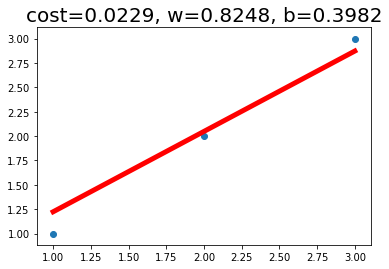

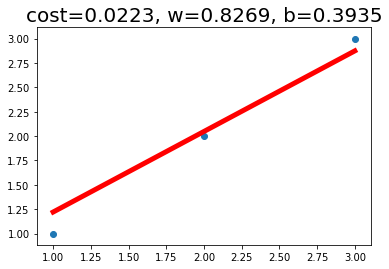

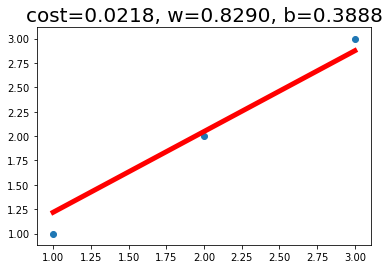

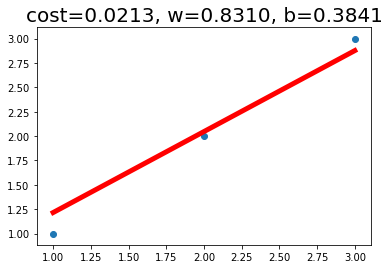

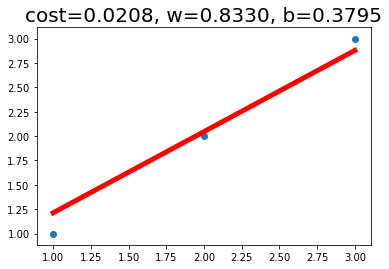

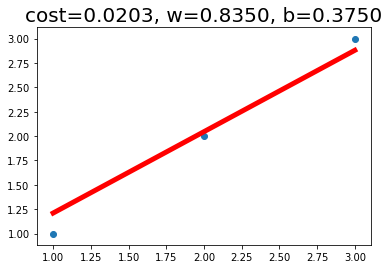

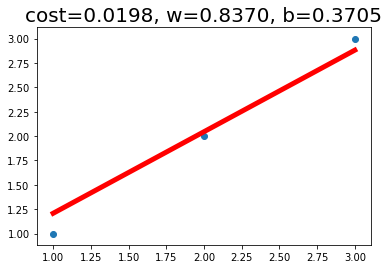

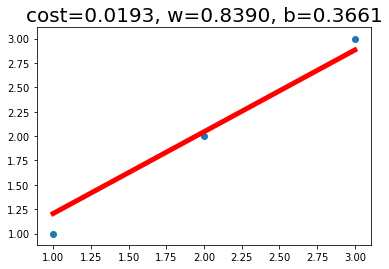

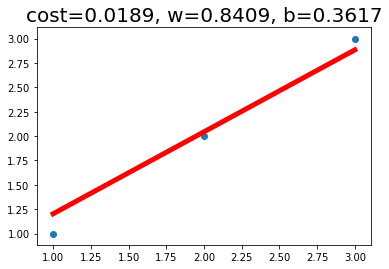

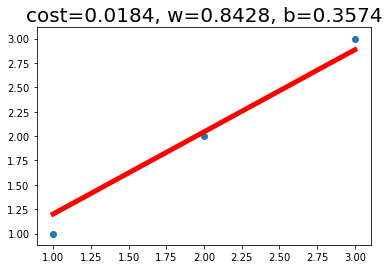

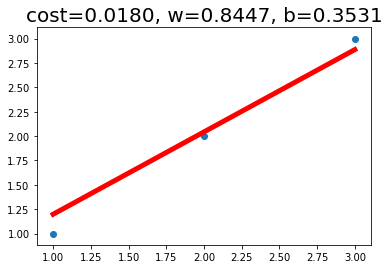

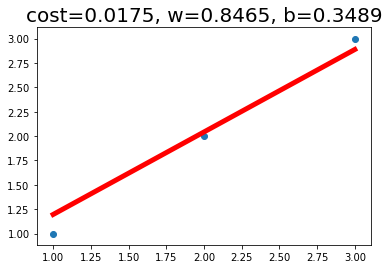

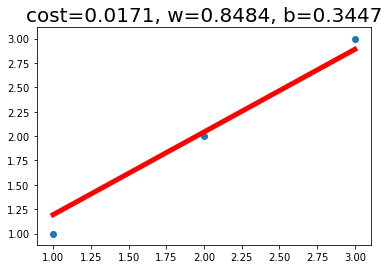

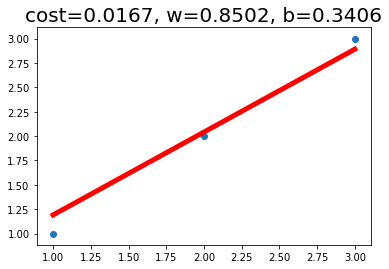

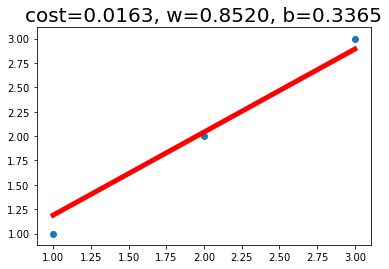

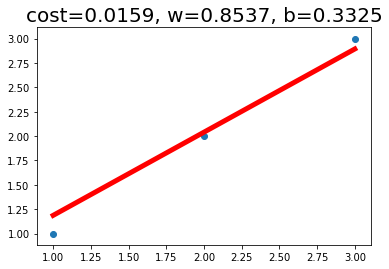

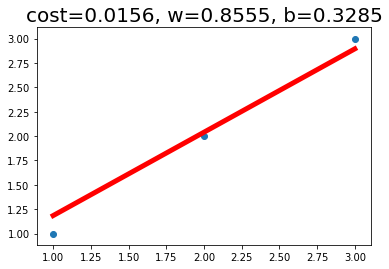

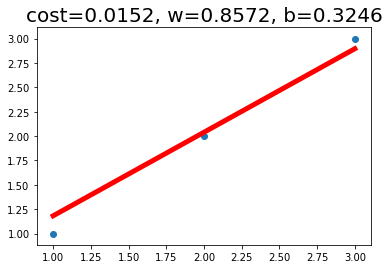

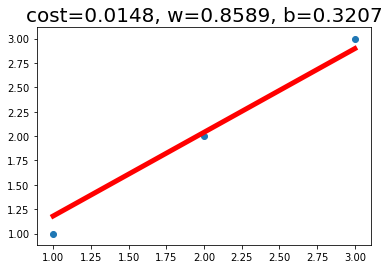

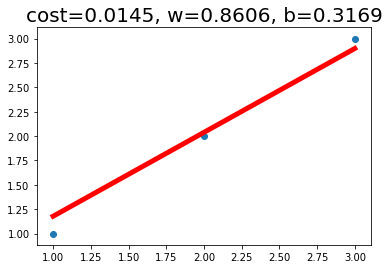

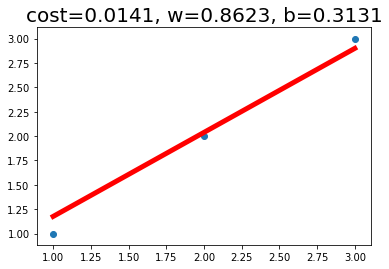

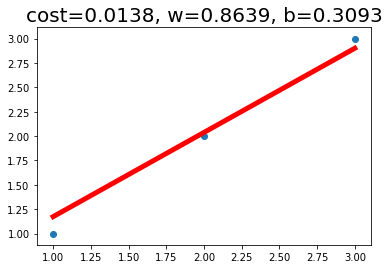

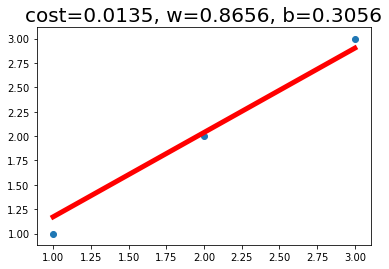

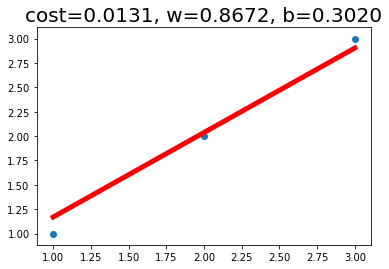

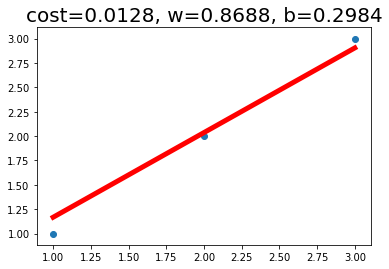

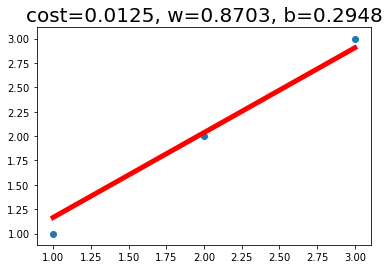

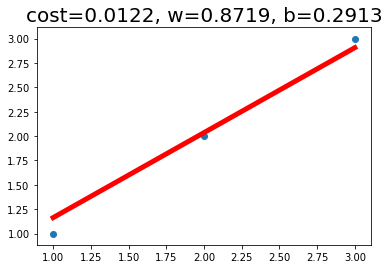

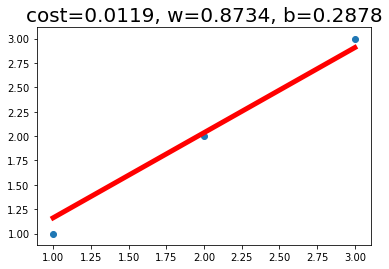

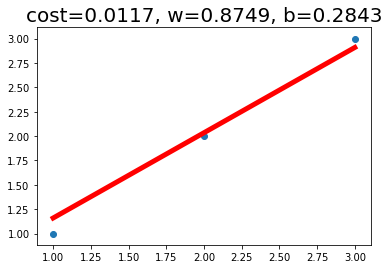

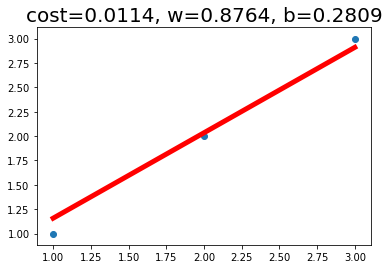

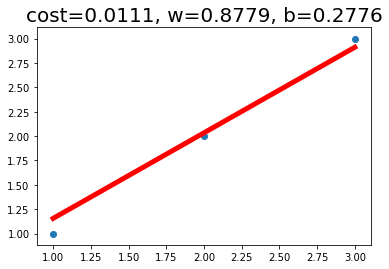

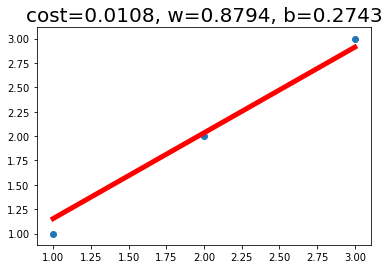

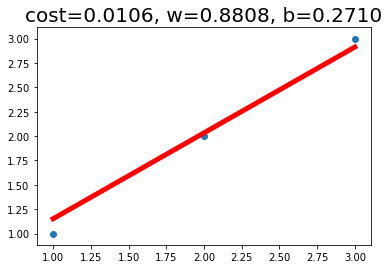

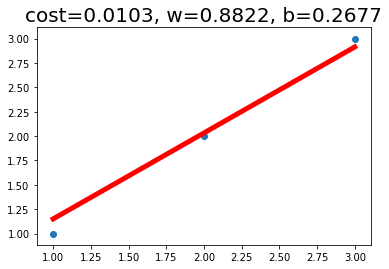

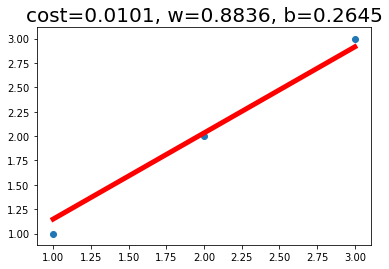

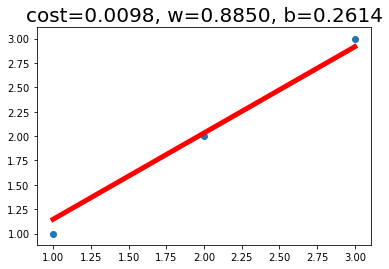

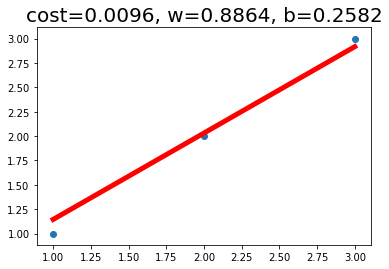

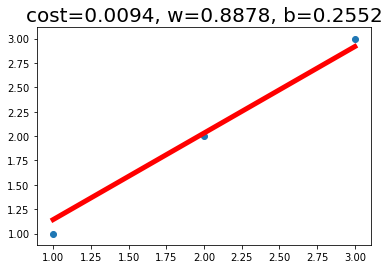

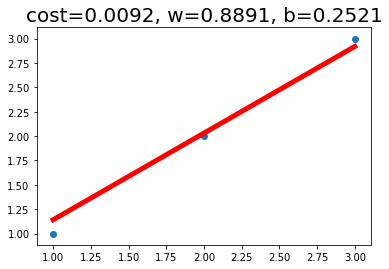

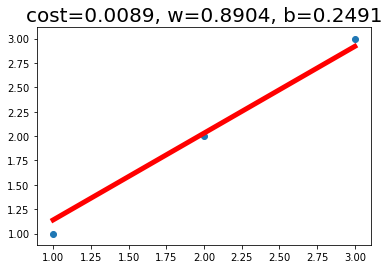

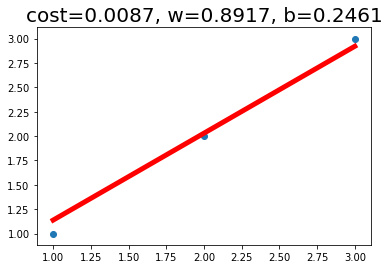

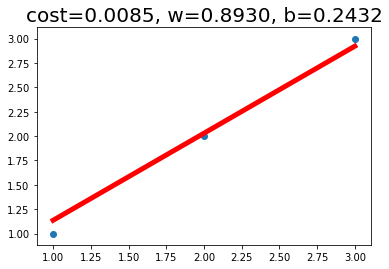

Linear Model Optimization is Done!


In [24]:
plt.ion()   # something about plotting

for step in range(300):
    
    prediction = model(x)               # input x and predict based on x
    cost = cost_func(prediction, y)     # must be (1. prediction, 2. training target y)

    optimizer.zero_grad()               # clear gradients for next traing
    
    cost.backward()                     # compute gradient value of parameters
    
    optimizer.step()                    # update gradients !!

    #print ('dL/dw: ', model.weight.grad) 
    #print ('dL/db: ', model.bias.grad)
    
    if step % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.title('cost=%.4f, w=%.4f, b=%.4f' % (cost.data[0], model.weight.data[0][0],model.bias.data[0]), fontdict={'size': 20} )
        plt.show()
        plt.pause(0.1)
        
print('Linear Model Optimization is Done!')

plt.ioff()

In [25]:
x_test = Variable(torch.Tensor([[7]]))
y_test = model(x_test)

print('input: %.4f, output: %.4f' % (x_test.data[0][0], y_test.data[0][0]) )

input: 7.0000, output: 6.4992


###  Has "nn.MSELoss()"  Convex Cost Space?

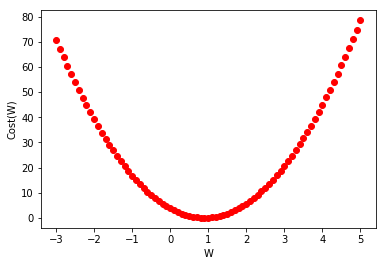

In [26]:
W_val, cost_val = [], []

for i in range(-30, 51):
    W = i*0.1
    model.weight.data.fill_(W)
    cost = cost_func(model(x),y)
    
    #print('{:.2f}, {:.2f}'.format(W, cost.data[0]))
    W_val.append(W)
    cost_val.append(cost.data[0])

# ------------------------------------------ #
plt.plot(W_val, cost_val, 'ro')
plt.ylabel('Cost(W)')
plt.xlabel('W')
plt.show()

## Multivariate Linear Regression

In [27]:
import numpy as np

### Loading Multivariate Data

In [31]:
xy = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]

print('shape: ', x_data.shape, '\nlength:', len(x_data), '\n', x_data )
print('shape: ', y_data.shape, '\nlength:', len(y_data), '\n', y_data )

shape:  (25, 3) 
length: 25 
 [[  73.   80.   75.]
 [  93.   88.   93.]
 [  89.   91.   90.]
 [  96.   98.  100.]
 [  73.   66.   70.]
 [  53.   46.   55.]
 [  69.   74.   77.]
 [  47.   56.   60.]
 [  87.   79.   90.]
 [  79.   70.   88.]
 [  69.   70.   73.]
 [  70.   65.   74.]
 [  93.   95.   91.]
 [  79.   80.   73.]
 [  70.   73.   78.]
 [  93.   89.   96.]
 [  78.   75.   68.]
 [  81.   90.   93.]
 [  88.   92.   86.]
 [  78.   83.   77.]
 [  82.   86.   90.]
 [  86.   82.   89.]
 [  78.   83.   85.]
 [  76.   83.   71.]
 [  96.   93.   95.]]
shape:  (25, 1) 
length: 25 
 [[ 152.]
 [ 185.]
 [ 180.]
 [ 196.]
 [ 142.]
 [ 101.]
 [ 149.]
 [ 115.]
 [ 175.]
 [ 164.]
 [ 141.]
 [ 141.]
 [ 184.]
 [ 152.]
 [ 148.]
 [ 192.]
 [ 147.]
 [ 183.]
 [ 177.]
 [ 159.]
 [ 177.]
 [ 175.]
 [ 175.]
 [ 149.]
 [ 192.]]


In [30]:
x, y = Variable(torch.from_numpy(x_data)), Variable(torch.from_numpy(y_data))

### Define Multivariabe Linear Regression Model

In [32]:
# Our hypothesis XW+b
mv_model = nn.Linear(3, 1, bias=True)

print( mv_model )

Linear (3 -> 1)


In [33]:
print( 'weight: ', mv_model.weight ) 
print( 'bias: ', mv_model.bias ) 

weight:  Parameter containing:
-0.3623 -0.1294 -0.1783
[torch.FloatTensor of size 1x3]

bias:  Parameter containing:
 0.1960
[torch.FloatTensor of size 1]



In [35]:
# cost function
cost_func = nn.MSELoss()

# Optimizer
optimizer = torch.optim.SGD(mv_model.parameters(), lr=1e-5)

### Train Your Model

In [41]:
# Train the model
for step in range(2001):
    optimizer.zero_grad()
    
    # Our model
    prediction = mv_model(x)
    cost = cost_func(prediction, y)
    cost.backward() 
    
    #print(mv_model.weight.grad)
    #print(mv_model.bias.grad)
    #print(mv_model.weight)
    #print(mv_model.bias)
    #print(mv_model.state_dict())
    
    optimizer.step()

    if step % 50 == 0:
        print(step, "Cost: ", cost.data.numpy(), "\nPrediction:\n", prediction.data.t().numpy())


0 Cost:  [ 6.14515972] 
Prediction:
 [[ 152.9508667   184.63365173  181.38970947  198.79138184  140.0255127
   105.32801819  150.48974609  113.88083649  174.3008728   164.32136536
   143.95059204  142.79457092  186.11550903  152.99795532  151.44546509
   188.48214722  144.44723511  181.16793823  177.11343384  158.63235474
   176.11242676  174.40103149  167.48716736  151.2376709   190.61743164]]
50 Cost:  [ 6.14480305] 
Prediction:
 [[ 152.95040894  184.63314819  181.38912964  198.79168701  140.02432251
   105.32859039  150.49134827  113.88395691  174.30155945  164.32406616
   143.95117188  142.79550171  186.11393738  152.99528503  151.44717407
   188.48252869  144.44354248  181.17045593  177.11178589  158.63104248
   176.11399841  174.401474    167.4883728   151.23495483  190.61645508]]
100 Cost:  [ 6.14444685] 
Prediction:
 [[ 152.94996643  184.63264465  181.38856506  198.79197693  140.02316284
   105.32913971  150.49293518  113.88702393  174.30221558  164.32670593
   143.95175171  14

In [38]:
mv_model.state_dict()

OrderedDict([('weight', 
               0.4143  0.5532  1.0457
              [torch.FloatTensor of size 1x3]), ('bias', 
               0.2023
              [torch.FloatTensor of size 1])])

### Test

In [42]:
# Predict my score
print("Your score will be ", mv_model(Variable(torch.Tensor([[100, 70, 101]]))).data.numpy())
print("Other scores will be ", mv_model(Variable(torch.Tensor([[60, 70, 110], [90, 100, 80]]))).data.numpy())

Your score will be  [[ 186.63723755]]
Other scores will be  [[ 181.94021606]
 [ 175.32598877]]
